In [107]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
import pandas as pd
from pylab import rcParams

b) The revenue without overbook is $24,000 ($120*200), while for best case scenario where 250 tickets are sold and 50 no show passengers is $30,000 ($120*250).  Show the revenue calculation for worst case scenario.

In [131]:
print('$'+str((120*300) - (50*300)))

$21000


c) Using the python library from matplotlib/seaborn and scipy.stats write codes to plot the probability mass function (pmf) for the above scenario. 

In [109]:
result = []
for i in range(1,300):
    result.append(binom.pmf(i,250, 0.8))

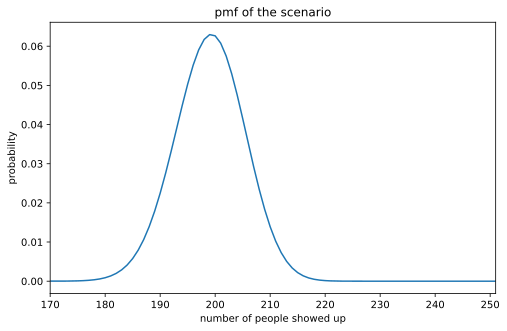

In [110]:
plt.plot(result)
plt.title('pmf of the scenario')
plt.xlabel('number of people showed up')
plt.ylabel('probability')
plt.xlim(170, 251)
plt.show()

d) What is the probability of passengers showed up for:
i) 200
ii)250

In [114]:
for m in [200, 250]:
    print('The probability of {} passengers showed up for {}'.format(m, binom.pmf(m, 250, 0.8)))

The probability of 200 passengers showed up for 0.06296802394481274
The probability of 250 passengers showed up for 5.922386521532938e-25


e) What is the expected revenue of 250 tickets sold?

In [130]:
rev = 0
for i in range(251):
    rev = rev + binom.pmf(i, 250, 0.8) * (i * 120 - max(i - 200, 0) * 300)
print('$'+str(rev))

$23244.38371266224


f) Is 250 overbook tickets the most optimal number? Run a simulation of expected revenue from 201 to 260 tickets sold.

In [129]:
ticket_sold = []
simulated_rev = []

for k in range (201,261):
    rev = 0
    for i in range(k):
        rev = rev + binom.pmf(i, k, 0.8) * (i * 120 - max(i - 200, 0) * 300)
    ticket_sold.append(k)
    simulated_rev.append(rev)

simulated_rev_df = pd.DataFrame(
    {'Number of ticket sold': ticket_sold,
     'Revenue': simulated_rev,
    })
result = simulated_rev_df.loc[simulated_rev_df['Revenue'].idxmax()]

print('Optimal ticket number is ' + str(result[0]) + ' with revenue $' + str(result[1]))

Optimal ticket number is 248.0 with revenue $23274.185889695185


g) Plot the number of tickets sold against expected revenue and draw a vertical line to mark the optimal number of tickets sold.


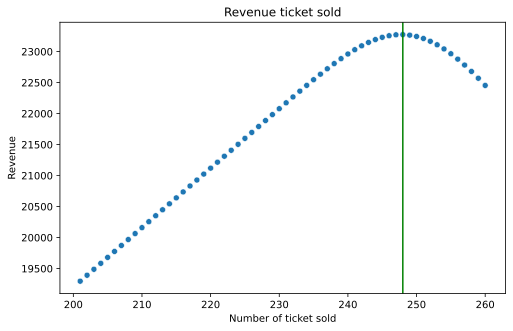

In [128]:
plt.title('Revenue ticket sold')
plt.axvline(result [0],color='green')
sns.scatterplot(x = 'Number of ticket sold', y = 'Revenue', data = simulated_rev_df)
plt.show()

h ) By using the optimal number of tickets from (f) and with the shown up rate of 80%, generate 10,000 random numbers to simulate the possible number of passengers that show up . (hint : .rvs(n, p, size=10000))

In [127]:
Simulated_f = pd.DataFrame({'Number of passenger show up' :binom.rvs(n = 248, p = 0.8, size = 10000)})
Simulated_f

,Number of passenger show up
0,190
1,207
2,209
3,204
4,192
...,...
9995,192
9996,210
9997,184
9998,204


i) What is the min, max and 95% percentile of the number of passengers showing up from (g)?

In [126]:
print('Min passengers = ' + str(Simulated_f['Number of passenger show up'].min()))
print('Max passengers = ' + str(Simulated_f['Number of passenger show up'].max()))
print('95% percentile passengers = ' + str(Simulated_f['Number of passenger show up'].quantile(0.95)))

Min passengers = 171
Max passengers = 226
95% percentile passengers = 208.0


j) What if the passenger isn’t traveling alone, describe how it affects the model.

Need to use another distribution, this is because the traveller is not independent anymore.

k) For the solutions, you should as much as possible minimize the usage of loop and instead be replaced with matrix computation (i.e numpy multiplication). 


In [125]:
revenue_func = lambda x: binom.pmf(x, 250, 0.8)
revenue_numpy = np.vectorize(revenue_func)(np.arange(170, 251))

df_revenue_numpy = pd.DataFrame(
    {'num of people showed up': np.arange(170, 251),
    'probability': revenue_numpy
})
df_revenue_numpy

,num of people showed up,probability
0,170,2.522169e-06
1,171,4.719848e-06
2,172,8.671348e-06
3,173,1.563850e-05
4,174,2.768194e-05
...,...,...
76,246,3.675645e-19
77,247,2.380984e-20
78,248,1.152089e-21
79,249,3.701492e-23


l) From your observation or research on Involve Asia, how do you think this scenario relates to the business model?


From my research, in Involve Asia through it platform, this scenario can relate to the business by using this revenue model to improve the optimization of the company that Involve Asia is working with. For an example, through Lazada, Involve Asia can predict how much should the company pay on its affiliate marketer for an optimum cost.